# Titanic Machine Learning

## Load data

#### inspiration from https://github.com/glouppe/tutorials-scikit-learn/blob/master/1.%20An%20introduction%20to%20Machine%20Learning%20with%20Scikit-Learn.ipynb

In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
df_train = pd.read_csv('data/train.csv')
#df_train.set_index('PassengerId',inplace = True)
df_test = pd.read_csv('data/test.csv')
#df_test.set_index('PassengerId',inplace = True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import re
import numpy as np

columns = [
    'Pclass',
    'Age',
    'Fare',
    'SibSp',
    'Parch',
    'Embarked',
    'Cabin'
]
df = df_train[columns+['Survived']]

# The port of embarking on the Titanic
emb_dict = {'S':0, 'C':1, 'Q':2}
df['Embarked'].replace(emb_dict,inplace=True)

# Cabin deck on the Titanic
r = df.Cabin.str.extract('.(\d+)')
#df['Room'] = pd.Series(df.Cabin.str.extract('.(\d+)'), index=df.index)
df = df.assign(Room=r.values)
cabin_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'T':8, 'n':None, 'an':None}
df['Cabin'] = df['Cabin'].astype(str).str[0]
df['Cabin'].replace(cabin_dict,inplace=True)

#df = df.dropna(axis=0, how='any')
X = df[columns+['Room']]
y = df['Survived']

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#X_final_test = df_test[columns]
#X_final_test=(X_final_test-X_final_test.mean())/X_final_test.std()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [5]:
df

,Pclass,Age,Fare,SibSp,Parch,Embarked,Cabin,Survived,Room
0,3,22.0,7.2500,1,0,0.0,NaN,0,NaN
1,1,38.0,71.2833,1,0,1.0,2.0,1,85
2,3,26.0,7.9250,0,0,0.0,NaN,1,NaN
3,1,35.0,53.1000,1,0,0.0,2.0,1,123
4,3,35.0,8.0500,0,0,0.0,NaN,0,NaN
5,3,NaN,8.4583,0,0,2.0,NaN,0,NaN
6,1,54.0,51.8625,0,0,0.0,4.0,0,46
7,3,2.0,21.0750,3,1,0.0,NaN,0,NaN
8,3,27.0,11.1333,0,2,0.0,NaN,1,NaN
9,2,14.0,30.0708,1,0,1.0,NaN,1,NaN


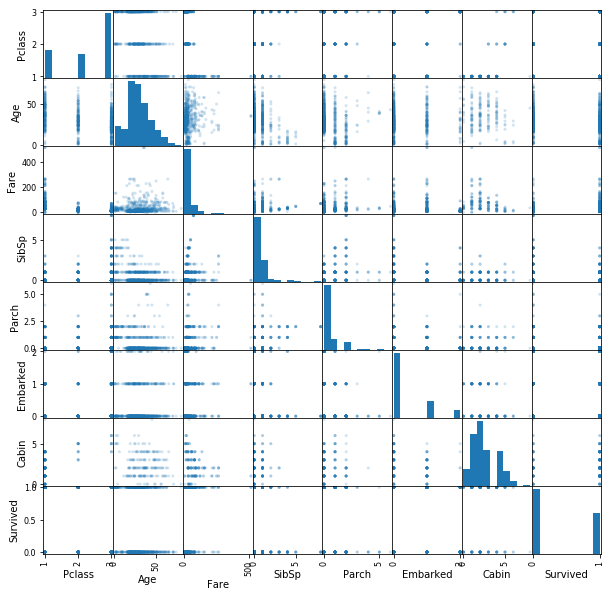

In [6]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

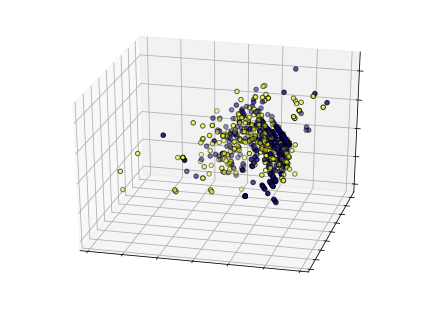

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

fig = plt.figure(1, figsize=(6, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=104)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_PCA = pca.transform(X)

#for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
#    ax.text3D(X_PCA[y == 0].mean(),
#              X_PCA[y == 1].mean() + 1.5,
#              X_PCA[y == label, 2].mean(), name,
#              horizontalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
## Reorder the labels to have colors matching the cluster results
####y_choose = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y, cmap=plt.cm.plasma,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

NameError: name 'X' is not defined

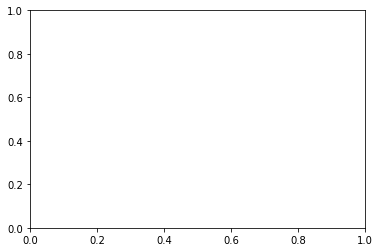

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

fig = plt.figure(1, figsize=(6, 4))
plt.clf()
ax = plt.gca()

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=plt.cm.plasma,
           edgecolor='k')
ax.legend

## Fitting algorithms

### K-nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier                                                    

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

### Gaussian process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

### Multi-layer perceptron

In [ ]:
?sklearn.neural_network.MLPClassifier

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.23353293413173648
Testing error = 0.2376681614349776


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")  # try kernel="rbf" instead
clf.fit(X_train, y_train)

from sklearn.metrics import zero_one_loss
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Testing error =", zero_one_loss(y_test, clf.predict(X_test)))

## Model evaluation

### Training and test error

In [13]:
from sklearn.metrics import zero_one_loss

print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.23353293413173648
Test error = 0.2376681614349776


### Cross-validation error

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

### Default score (R)

In [14]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

NameError: name 'KNeighborsClassifier' is not defined

### Accuracy

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.7623318385650224


### Precission, recall and F-score

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.7066666666666667
Recall = 0.6309523809523809
F = 0.6666666666666667


## Learning curve

In [6]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


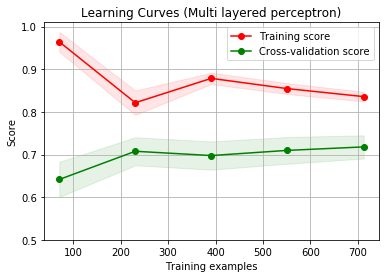

In [22]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

title = "Learning Curves (Multi layered perceptron)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(100, 100),learning_rate="invscaling",max_iter=1000)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

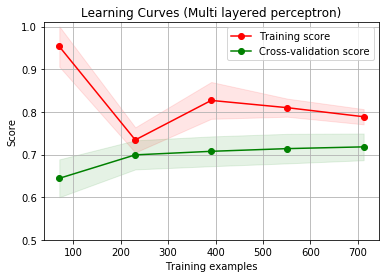

In [9]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

title = "Learning Curves (Multi layered perceptron)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="tanh", learning_rate="invscaling",max_iter=1000)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.svm import SVC

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

### Validation curve

NameError: name 'SVC' is not defined

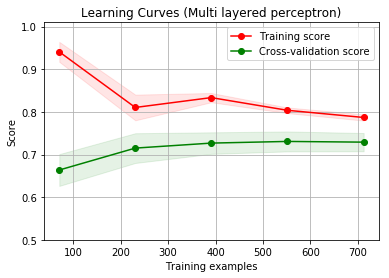

In [19]:
from sklearn.model_selection import validation_curve
title = "Learning Curves (Multi layered perceptron)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = MLPClassifier(max_iter=1000)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)










title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()


In [17]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(3, 200)
param_name = "Passengers"

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=5), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
?sklearn.model_selection.validation_curve